## VGG16 
### DATASET : JAFFE

**Setup**

In [3]:
import numpy as np 
import pandas as pd

import seaborn as sns
from tensorflow import keras

**Importing the data**

In [4]:
import os, cv2

data_path = '../dataset/JAFFE'
data_dir_list = os.listdir(data_path)
print(data_dir_list)

img_rows = 256
img_cols = 256
num_channel = 1

img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

['jaffedbase']


(213, 128, 128, 3)

**Analyzing the dataset**

Distribution of classes

In [5]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29] = 0 #30
labels[30:58] = 1 #29
labels[59:90] = 2 #32
labels[91:121] = 3 #31
labels[122:151] = 4 #30
labels[152:182] = 5 #31
labels[183:] = 6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

**Train-Validation-Test Split (80-10-10)**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.utils import shuffle

In [8]:
num_classes = 7

Y = keras.utils.to_categorical(labels, num_classes)

x, y = shuffle(img_data, Y, random_state = 2)

X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size = 0.2, shuffle = True, random_state = 20) 

**Visualising the dataset**

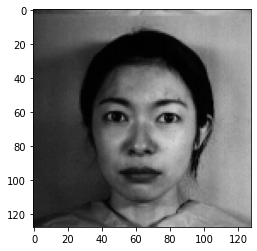

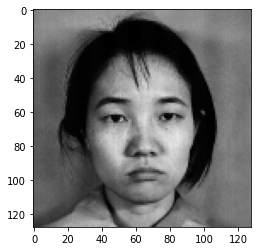

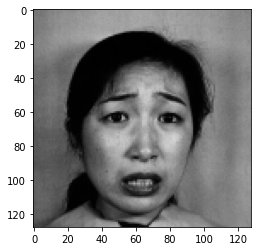

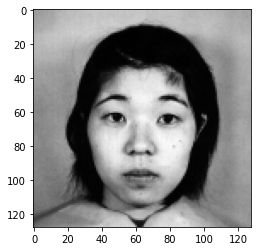

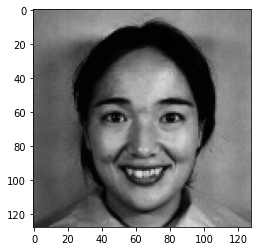

In [9]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(X_train[i])
    plt.show()

**Building the model**

In [10]:
import keras
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import (Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Concatenate, LeakyReLU, BatchNormalization, concatenate)

In [11]:
#EVALUATION

import keras.backend as K
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [12]:
#EVALUATION

METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),  
           tf.keras.metrics.AUC(name='auc'), f1_score]

In [25]:
# img_rows, img_colums, color_channels
input_shape = (128, 128, 3)

# Build Model
model = models.Sequential()

model.add(Conv2D(64, (3, 3), input_shape = input_shape, activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(512, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
    
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss = "categorical_crossentropy", metrics = METRICS, optimizer = 'adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_6 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 128)      

**Training the model**

In [58]:
history = model.fit(X_train,y_train, epochs = 90, validation_data = (X_test, y_test))

Epoch 1/90
6/6 [==============================] - 1s 159ms/step - loss: 0.0326 - accuracy: 0.9983 - precision: 0.9941 - recall: 0.9941 - auc: 1.0000 - f1_score: 0.9948 - val_loss: 4.2585 - val_accuracy: 0.8173 - val_precision: 0.3571 - val_recall: 0.3488 - val_auc: 0.6997 - val_f1_score: 0.3268
Epoch 2/90
6/6 [==============================] - 1s 167ms/step - loss: 0.1176 - accuracy: 0.9891 - precision: 0.9645 - recall: 0.9588 - auc: 0.9987 - f1_score: 0.9600 - val_loss: 7.2905 - val_accuracy: 0.7874 - val_precision: 0.2558 - val_recall: 0.2558 - val_auc: 0.5957 - val_f1_score: 0.2614
Epoch 3/90
6/6 [==============================] - 1s 153ms/step - loss: 0.1113 - accuracy: 0.9933 - precision: 0.9880 - recall: 0.9647 - auc: 0.9958 - f1_score: 0.9785 - val_loss: 0.7921 - val_accuracy: 0.9070 - val_precision: 0.6923 - val_recall: 0.6279 - val_auc: 0.9538 - val_f1_score: 0.6387
Epoch 4/90
6/6 [==============================] - 1s 151ms/step - loss: 0.0438 - accuracy: 0.9966 - precision: 0

In [ ]:
# Save Model
models.save_model(model, 'JAFFE_vgg16.h5')

**Plotting accuracy and loss**

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.metrics import categorical_accuracy

<Figure size 432x288 with 0 Axes>

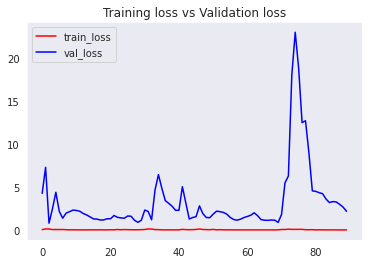

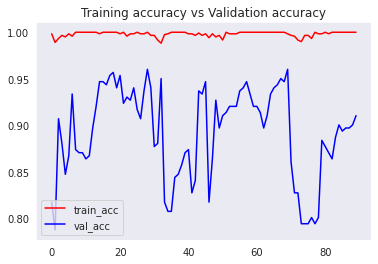

<Figure size 432x288 with 0 Axes>

In [60]:
# visualizing losses and accuracy
%matplotlib inline

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label = 'train_loss')
plt.plot(epochs,val_loss,'b', label = 'val_loss')
plt.title('Training loss vs Validation loss')
plt.legend()
plt.savefig('trainloss.png')
plt.figure()

plt.plot(epochs,train_acc,'r', label = 'train_acc')
plt.plot(epochs,val_acc,'b', label = 'val_acc')
plt.title('Training accuracy vs Validation accuracy')
plt.legend()
plt.savefig('trainacc.png')
plt.figure()

# Quantitative Prediction

**Accuracy and Loss**

In [68]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_auc = history.history['auc']
val_auc = history.history['val_auc']

In [70]:
#EVALUATION

print('Train Accuracy: ', round(history.history['accuracy'][-1],2))
print('Train Loss: ', round(history.history['loss'][-1],2))
print('Train Precision: ', round(history.history['precision'][-1],2))
print('Train Recall: ', round(history.history['recall'][-1],2))
print('Train F1-Score: ', round(history.history['f1_score'][-1],2))

Train Accuracy:  1.0
Train Loss:  0.01
Train Precision:  1.0
Train Recall:  1.0
Train F1-Score:  1.0


In [71]:
#EVALUATION

print('Test Accuracy: ', round(history.history['val_accuracy'][-1],2))
print('Test Loss: ', round(history.history['val_loss'][-1],2))
print('Test Precision: ', round(history.history['val_precision'][-1],2))
print('Test Recall: ', round(history.history['val_recall'][-1],2))
print('Test F1-Score: ', round(history.history['val_f1_score'][-1],2))

Test Accuracy:  0.91
Test Loss:  2.17
Test Precision:  0.69
Test Recall:  0.67
Test F1-Score:  0.67


**Confusion Matrix**

In [61]:
# evaluate model on test set
acc = model.evaluate(X_test, y_test)
print ("model %s: %.2f%%" % (model.metrics_names[1], acc[1]*100))

2/2 [==============================] - 0s 34ms/step - loss: 2.1673 - accuracy: 0.9103 - precision: 0.6905 - recall: 0.6744 - auc: 0.8784 - f1_score: 0.6674
model accuracy: 91.03%


In [62]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)

2/2 [==============================] - 0s 48ms/step


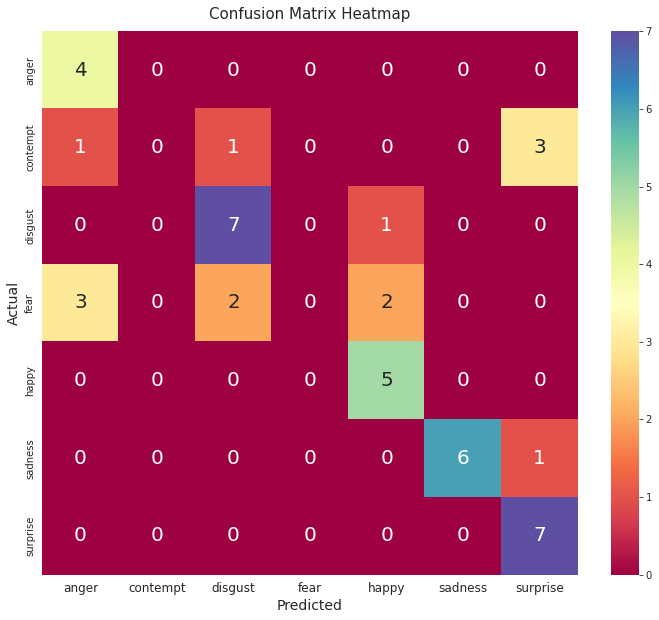

In [63]:
conf_mat = confusion_matrix(np.where(y_test == 1)[1],Y_pred)
sns.set_style(style='dark')
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":20},cmap='Spectral')
heatmap.set_title('Confusion Matrix Heatmap', fontdict={'fontsize':15}, pad=12)
heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
heatmap.set_xticklabels(['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], fontdict={'fontsize':12})
heatmap.set_yticklabels(['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], fontdict={'fontsize':10})
plt.show()

# Qualitative Prediction

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.metrics import categorical_accuracy

Test Loss: 2.1673128604888916
Test accuracy: 0.9102990031242371
1/1 [==============================] - 0s 18ms/step
[0 2 0 4 6 4 0 2 2]
[0 2 1 4 6 4 3 2 3]


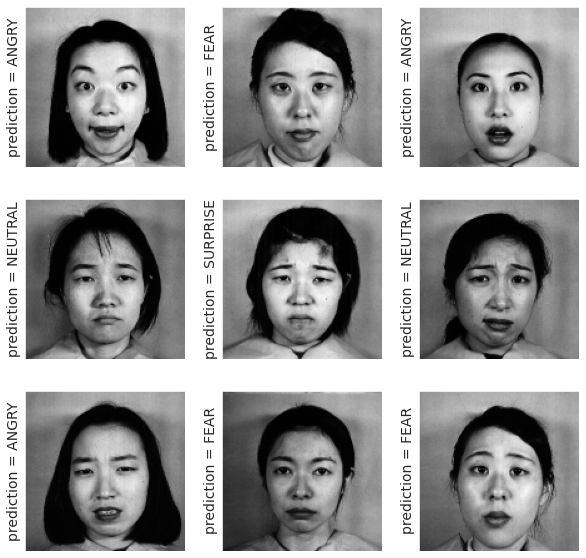

In [72]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

res = model.predict(X_test[:9]).argmax(axis=-1)
print(res)
print(y_test[:9].argmax(axis=-1))
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)

# show the plot
plt.show()